In [391]:
def disc_sample(n, seed = 42):
    
    np.random.seed = seed
    
    r = np.random.uniform(0, 1, n)
    phi = np.random.uniform(0, 2*np.pi, n)
    
    r = np.sqrt(r)
    
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    
    return [x, y]

In [392]:
def show_morphing(Dx, Dy, x, y, xlabel = 0, ylabel = 0, k = 10):
    
    # creating the grid (x,y)
    n, m = len(x), len(y)
    
    xl = np.linspace(np.min(x), np.max(x), int(n/k))
    yl = np.linspace(np.min(y), np.max(y), int(m/k))
    
    X, Y = np.meshgrid(xl, yl)
    
    # computing the vector components 
    fx = Dx(X, Y)
    fy = Dy(X, Y)
    
    fig = plt.figure(figsize = (8,8))

    plt.quiver(X, Y, fx, fy, color='r')

In [393]:
X, Y = disc_sample(10000)

In [394]:
Dx = lambda x, y: -x**2*np.sign(x)/2
Dy = lambda x, y: -y**2*np.sign(y)/2

In [395]:
Dx(-1, 1)

0.5

In [396]:
Dy(-1, 1)

-0.5

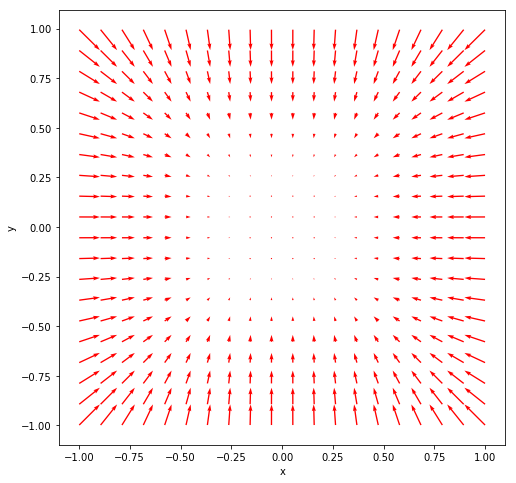

In [397]:
show_morphing(Dx, Dy, X, Y, k = 500)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"campo-1", dpi=150)

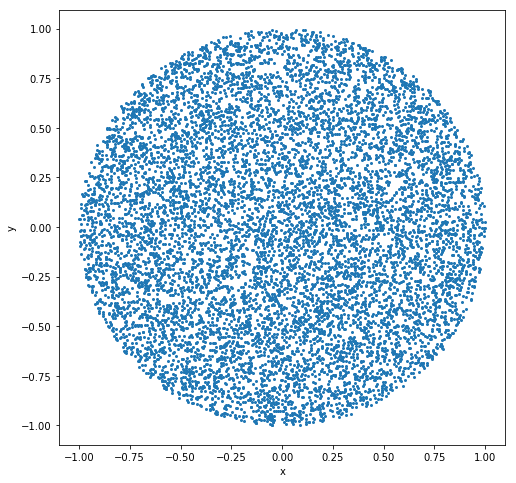

In [462]:
plt.figure(figsize=(8,8))
plt.plot(X, Y, 'o', markersize = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"dados-1", dpi=150)

In [399]:
xl = X + Dx(X,Y)
yl = Y + Dy(X,Y)

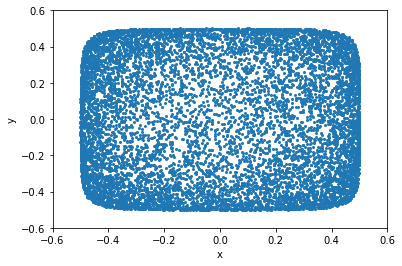

In [400]:
plt.plot(xl, yl, 'o', markersize = 2)
plt.xlim((-0.6, 0.6))
plt.ylim((-0.6, 0.6))
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"resultados-1", dpi=150)

In [401]:
normal = lambda x, m, s: 1/np.sqrt(2*np.pi*s**2)*np.exp(-(x-m)**2/(2*s))

In [402]:
exp = lambda x, m: np.exp(x-m)

In [403]:
def Dx(x, y):
    
    if (x+0.15)**2 + (y+0.15)**2 < 0.15:
        
        return -(x+0.15)**2*np.sign(x+0.15)/2
        
    elif (x-0.15)**2 + (y-0.15)**2 < 0.15:
    
        return -(x-0.15)**2*np.sign(x-0.15)/2
    else:
        
        return 0.01

def Dy(x, y):
    
    if (x+0.15)**2 + (y+0.15)**2 < 0.15:
        
        return -(y+0.15)**2*np.sign(y+0.15)/2
    
    elif (x-0.15)**2 + (y-0.15)**2 < 0.15:
    
        return -(y-0.15)**2*np.sign(y-0.15)/2
    
    else:
        return 0.01
        
vDx = np.vectorize(Dx)
vDy = np.vectorize(Dy)

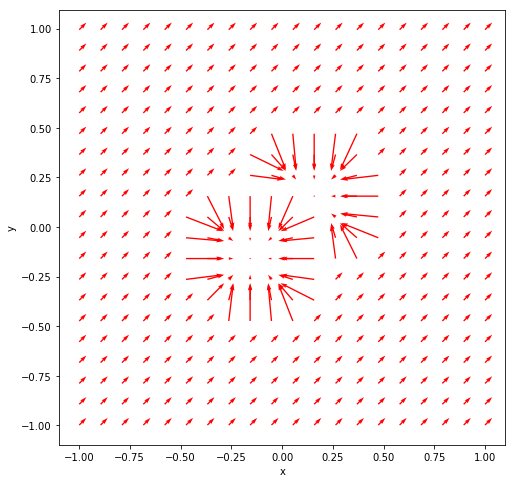

In [406]:
show_morphing(vDx, vDy, X, Y, k = 500)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"campo-2", dpi=150)

In [407]:
xl = X + vDx(X,Y)
yl = Y + vDy(X,Y)

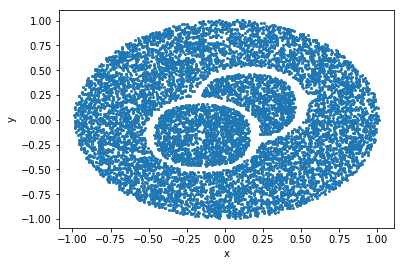

In [408]:
plt.plot(xl, yl, 'o', markersize = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"resultados-2", dpi=150)

In [409]:
Dx = lambda x,y: -np.sign(x)*1/(np.exp(np.abs(x)))
Dy = lambda x,y: 0

In [410]:
disc_1 = disc_sample(1000)
disc_2 = disc_sample(1000)

In [411]:
disc_1[0] -= 1.2
disc_2[0] += 1.2

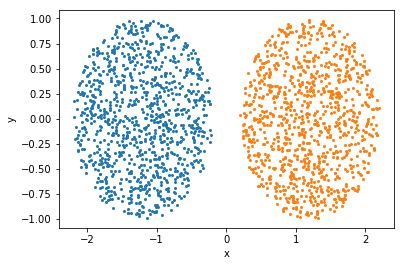

In [412]:
plt.plot(disc_1[0], disc_1[1], 'o', markersize = 2)
plt.plot(disc_2[0], disc_2[1], 'o', markersize = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"dados-3", dpi=150)

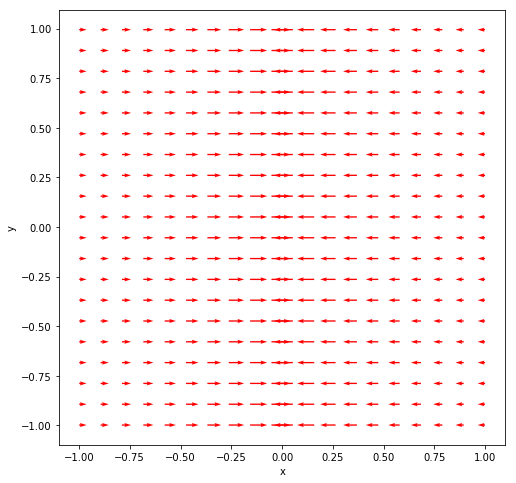

In [413]:
show_morphing(Dx, Dy, X, Y, k = 500)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"campo-3", dpi=150)

In [414]:
disc_1l = [disc_1[0]+Dx(disc_1[0],disc_1[1]), disc_1[1]+Dy(disc_1[0],disc_1[1])]
disc_2l = [disc_2[0]+Dx(disc_2[0],disc_2[1]), disc_2[1]+Dy(disc_2[0],disc_2[1])]

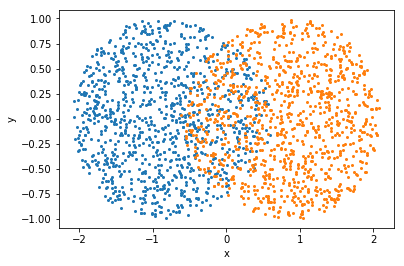

In [415]:
plt.plot(disc_1l[0], disc_1l[1], 'o', markersize = 2)
plt.plot(disc_2l[0], disc_2l[1], 'o', markersize = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"resultados-3", dpi=150)

In [416]:
fx = lambda x,y: (1 - 0)*(x - x.min())/(x.max() - x.min()) + (-0)
fy = lambda x,y: (1 - 0)*(y - y.min())/(y.max() - y.min()) + (-0)

In [417]:
disc = [np.concatenate((disc_1[0]+1.5, disc_2[0]+1.5), axis=None), np.concatenate((disc_1[1]+0.5, disc_2[1]+0.5), axis=None)] 

In [418]:
Dx = lambda x,y: fx(x, x) - x
Dy = lambda x,y: fy(y, y) - y

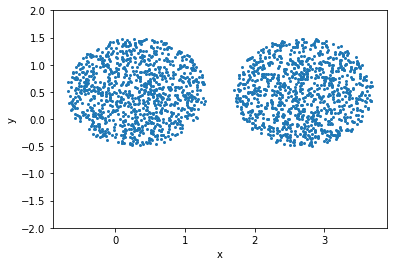

In [419]:
plt.plot(disc[0], disc[1], 'o', markersize = 2)
plt.ylim((-2,2))
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"dados-4", dpi=150)

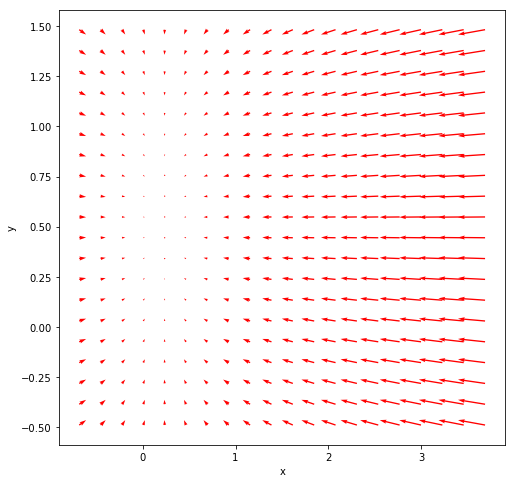

In [420]:
show_morphing(Dx, Dy, disc[0], disc[1], k = 100)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"campo-4", dpi=150)

In [421]:
discl = [disc[0]+Dx(disc[0],disc[1]), disc[1]+Dy(disc[0],disc[1])]

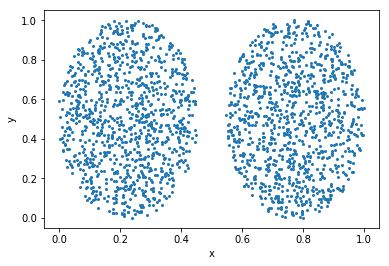

In [422]:
plt.plot(discl[0], discl[1], 'o', markersize = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"resultados-4", dpi=150)

In [423]:
standart = lambda x: (x - x.mean())/np.sqrt(x.var())

In [424]:
Dx = lambda x, y: standart(x) - x
Dy = lambda x, y: standart(y) - y

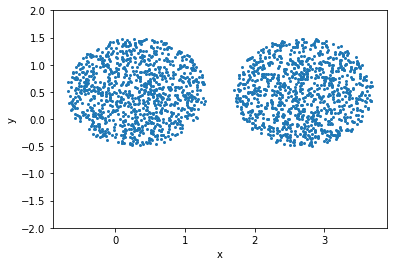

In [425]:
plt.plot(disc[0], disc[1], 'o', markersize = 2)
plt.ylim((-2,2))
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"dados-5", dpi=150)

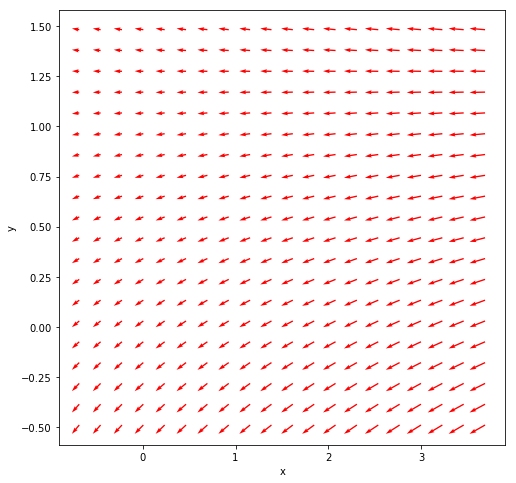

In [427]:
show_morphing(Dx, Dy, disc[0], disc[1], k = 100)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"campo-5", dpi=150)

In [428]:
discl = [disc[0]+Dx(disc[0],disc[1]), disc[1]+Dy(disc[0],disc[1])]

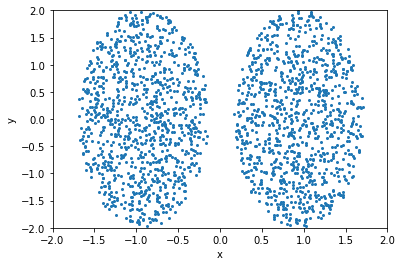

In [429]:
plt.plot(discl[0], discl[1], 'o', markersize = 2)
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"resultados-5", dpi=150)

In [452]:
rotation_matrix = lambda o: np.array([
    [np.cos(o), -np.sin(o)],
    [np.sin(o), np.cos(o)]
])

In [453]:
rotation_matrix(30)

array([[ 0.15425145,  0.98803162],
       [-0.98803162,  0.15425145]])

In [454]:
x, y = disc_sample(1000)

In [455]:
data = np.array(rotation_matrix(20).dot(np.array([x,y*0.5])))

In [456]:
eig_values, eig_vectors = al.eig(data_cov)

In [457]:
pc_explanations = eig_values/eig_values.sum()

In [458]:
pc_explanations

array([0.19279361, 0.80720639])

In [459]:
pca_transformation_matrix = eig_vectors[:, 0:2]

In [460]:
pca_transformation_matrix

array([[-0.91455753, -0.40445583],
       [ 0.40445583, -0.91455753]])

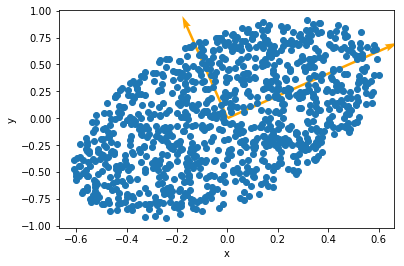

In [461]:
plt.plot(data[0], data[1], 'o')
plt.quiver(0, 0, -pca_transformation_matrix[0,0], -pca_transformation_matrix[0,1], scale = 1.8, color='orange')
plt.quiver(0, 0, -pca_transformation_matrix[1,0], -pca_transformation_matrix[1,1], scale = 3, color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f"resultados-6", dpi=150)

In [223]:
import numpy as np
from numpy import linalg as al

In [2]:
import matplotlib.pyplot as plt